# Task 1 SMS Spam Classification Using Random Forest

In this notebook, developing a text classification model to classify SMS messages as either spam or non-spam using a Random Forest classifier and also visualize the results with a pie chart.

 Import the necessary libraries.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

 Load the Dataset

In [4]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])
df.columns = ['label', 'message']
print(df.head())
print(df.isnull().sum())
print(df.columns)

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
label      0
message    0
dtype: int64
Index(['label', 'message'], dtype='object')


Preprocess the Data

In [5]:
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X = tfidf_vectorizer.fit_transform(df['message'])  
Y = df['label']

Split the Dataset

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Train the Random Forest Model

In [7]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)

Evaluate the Model

In [8]:
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy:.2f}')
class_report = classification_report(Y_test, Y_pred)
print('Classification Report:')
print(class_report)

Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       1.00      0.83      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



Visualize the Results

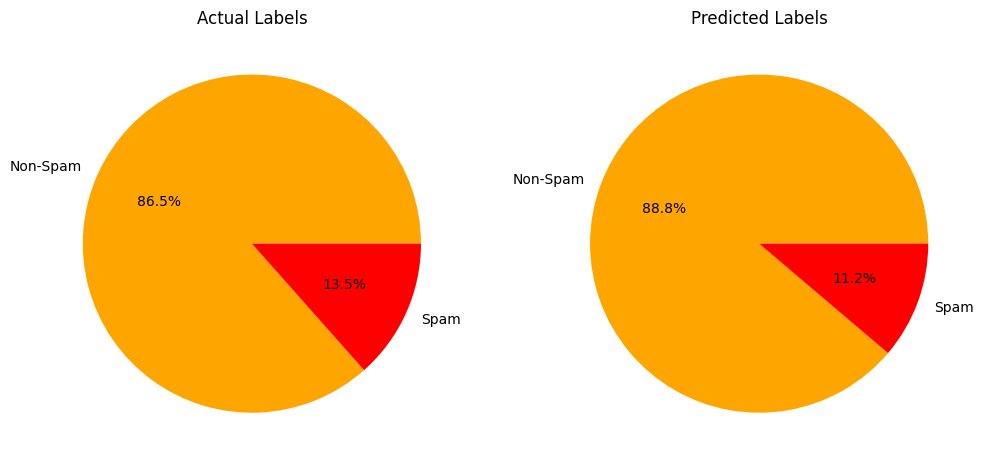

In [9]:
actual_counts = pd.Series(Y_test).value_counts()
pred_counts = pd.Series(Y_pred).value_counts()
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].pie(actual_counts, labels=['Non-Spam', 'Spam'], autopct='%1.1f%%', colors=['orange', 'red'])
axs[0].set_title('Actual Labels')
axs[1].pie(pred_counts, labels=['Non-Spam', 'Spam'], autopct='%1.1f%%', colors=['orange', 'red'])
axs[1].set_title('Predicted Labels')
plt.show()